# BTCS Scheme

I am assuming that at this point, you have understood what does finite difference methods mean, and have had some experience palying with the FTCS scheme, so I will not into detail explaining them. 

In the FTCS scheme, you have used a forward difference at time $t_n$ and a second order central difference for the space derivative at position $x_j$ to obtain a recurrence equation. Note that instead of \\(i\\) shown before in the FTCS method, I have used \\(j\\) to denote the position, but you have should have learnt till now that we can use whatever letter we wish, as long as we clearly state what the letter is supposed to represent, and we know clearly what the letter is supposed to represent. 

Finite differencing requires some information before we attempt to solve it. Typically, you have 

- The Differential equation you are applying the scheme to 
- The Boundary conditions for the differential equation
- The Initial conditions of the differential equation or the condition for the differential equation at some other point in time

## Contents

## I.       Differential Equation  - Applying BTCS
## II.      Boundary Conditions - Solving BTCS
## III.     Tridiagonal Matrices   - LU Decomposition 
## IV.     Example of BTCS
## V.      Initial Guess

##  I.    Differential Equation - Applying BTCS



For example, take our heat equation,  that is often written more compactly as

\\[ \frac{\partial U}{\partial t} = \alpha \Delta u \\]

we use the letter \\( U \\) to denote the temperature, letter \\( t \\) to denote the time 



Where the \\(\alpha \\) here denotes the thermal diffusivity of the medium. In some math books, you may see the heat equaiton without the \\(\alpha \\), because mathematicians are more concerned about the mathematical implications of the heat equation, rather than the physical implications. The thermal diffusivity of the medium is a physical property of the medium and is closely relatd to the physics, and the value of \\(\alpha \\) is usually given as a constant. However, the presence of a constant in differential equations, at least for a differential equation in the form of the heat equation, is not exactly the thing you worry about when solving differential equations during your exams. Thus, some math books may omit \\(\alpha \\) so that they are more focused on the mathematical deductions, rather than the actual physical implications involved. 

Since we are not mathematicians, and we actually care about the real world implications, in almost all engineering and physics book, \\(\alpha \\) remains in the heat equation, hence why \\(\alpha \\) is presented here. 

Where the big scary triangle up \\(\Delta\\)  that you may remember from your Math modules is called by the scary name of the Laplacian operator. <span style = "color:red">Note that \\(\Delta\\) could also mean a small change in sth, so be wary about this. A lot of times I got confused at this, so it's just a helpful reminder here!</span> 

In three dimensions, and let's use the Cartesian coordinate since you are most familiar with it, for an arbitrary function \\(f\\) the Laplacian operator is defined as being

\\[ \Delta f = \nabla ^2 f = \nabla \bullet \nabla f \\]

Knowing that in 3 dimensions, \\(\nabla\\) is defined as 

\\[ \nabla = (\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z})\\]

Thus the dot product, i.e. \\( \nabla \bullet \nabla \\), similar to how we do the dot product between vectors in 3 dimensions, can be written as

\\[ \nabla \bullet \nabla = (\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2})\\]

We understand that to get to \\( \Delta f \\), we need to well bring \\(\nabla \bullet \nabla \\) to \\( f \\), and thus we apply bring each term of \\(\nabla \bullet \nabla \\) to \\( f \\) , and thus we obtain 

\\[ \Delta f = (\frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}) \\]

Of course, you could easily increase or decrease the number of dimensions involved as needed for the Laplacian operator. Below we will see a two dimensional example, and then we will use a one dimensional example to illustrate the BTCS scheme, because my low dexterity stat means I will be more likely to mistype stuff if there are too many dimensions. 

for the normalized heat equation in two dimension, the differential equation that we have, is:

\\[\frac{dU}{dt} = \alpha (\frac{d^2 U}{dx^2} + \frac{d^2 U}{dy^2})\\]

for the normalized heat equation in one dimension, the differential equation that we have, is:

\\[\frac{dU}{dt} = \alpha \frac{d^2 U}{dx^2}\\]

Note that although I have gotten rid of \\( z \\), then \\( y \\), resulting in the 1D heat equation having the position denoted through \\( x \\); you could replace \\( x,y \;\;or\;\; z \\) here with any letter you see fit, as long as you know that the letter will be representing a position. Similarly, you could use any other letter than \\( U\\) to denote the temperature, as long as you know that the letter represents temperature. The same goes for \\( t \\). 

The explaination for the heat equation presented is straightforward. We know from basic classical thermodynamics that heat is transferred from locations of high temperature, i.e. higher average kinetic velocity of particles, to locations of lower temperature, i.e. lower average kinetic velocity of particles. We also know that how quickly heat is transferred depends on the temperature difference, so higher temperature difference results in faster heat transfer from one object to another, and lower temperature difference results in slower heat transfer from one object to another. 

A typical example would be using a knife to slice butter. A hot knife slices easily through butter because there is a large temperature difference between the hot knife and the butter, which causes the butter to melt around the hot knife and become easier to slice. A cold knife cannot slice easily through butter because there is only small or no temperature difference between the hot knife and butter, and the heat transfer from the knife to the butter (assuming that the knife is hotter than the butter) is very slow, which causes the butter to not melt, or at least melt slowly and makes it much harder to slice. 

Therefore, thanking the butter that was sacrified for the glory for thermodynamics, we understand that the temperature change with time of an object affected by heat transfer from or to its surroundings is proportional to temperature difference with its surroundings. The temperature change with time of an object can be written as \\( \partial U/\partial t \\). The temperature difference with its surroundings can be expressed as the derivative of the temperature with respect to distance.  We find that in practice, temperature change with time is actually proprotional to the second derivative of the temperature with respect to the distance, i.e.  \\( \partial ^2U/\partial x^2 \\). Since we have proportionality, we also must have a constant of proportionality, and the constant of proportionality for our heat equation is \\(\alpha \\) where the \\(\alpha \\) here denotes the thermal diffusivity of the medium. For the generalized form, we express through the Laplacian and adapt it to our problem depending on the number of dimensions of the problem. 

General: 

\\[ \frac{\partial U}{\partial t} = \alpha \Delta u \\]

for the normalized heat equation in three dimension, the differential equation that we have, is:

\\[\frac{\partial U}{\partial t} = \alpha (\frac{\partial^2 U}{dx^2} + \frac{\partial^2 U}{\partial y^2} + \frac{\partial^2 U}{\partial z^2})\\]

for the normalized heat equation in two dimension, the differential equation that we have, is:

\\[\frac{\partial U}{\partial t} = \alpha (\frac{\partial ^2 U}{\partial x^2} + \frac{\partial ^2 U}{\partial y^2})\\]

for the normalized heat equation in one dimension, the differential equation that we have, is:

\\[\frac{\partial U}{\partial t} = \alpha \frac{\partial ^2 U}{\partial x^2}\\]



There are types of boundary conditions, including the Dirichlet boundary condition, the Neumann boundary condition and the Robin Boundary conditions. What boundary conditions you use depends on the type of problem you have, and you can search up information about boundary conditions elsewhere. Here, I will assume that you already have a good grasp with boundary conditions. I will also assume that you know what do initial conditions means, and instead focus solely on the BTCS scheme. 

An important picture that summarizes the BTCS Scheme, that I obtained from Wikipedia since <span class="irony"> it is the most reliable source on the internet</span>, is as follows

![Image of BTCS](https://upload.wikimedia.org/wikipedia/commons/c/c6/Implicit_method-stencil.svg)

Here, our objective is to find the point at the location \\(j\\) and timestep \\(n+1\\). The BTCS scheme means backwards in time centered in space scheme. Looking at the illustration above, we see that there are three other points linked to the point at the location \\(j\\) and timestep \\(n+1\\). 

As expected, we are going to use those three points, and their relative relation to the point at location \\(j\\) and timestep \\(n+1\\) that we are trying to find for our BTCS scheme

Two of the points we are going to use are the point to the left at the location \\(j-1\\) and timestep \\(n+1\\) and  the point to the right at the location \\(j+1\\) and timestep \\(n+1\\), i.e. centered in space parts of BTCS, because the point we are trying to find at location \\(j\\) and timestep \\(n+1\\) is in the center between the point to the left at the location \\(j-1\\) and timestep \\(n+1\\), the point to the right at the location \\(j+1\\) and timestep \\(n+1\\).

Another point we are going to use is the point before in time at the location \\(j\\) and timestep \\(n\\). 

Notice that the shape of the illustration is T - shaped, with the T pointintg backwards in time. **B goes with T since it's backward in time and C goes with S because it is centered in space!**

<span style= "color:red"> Note that here, although it seens like \\(n\\) is on the y axis, it is important to keep in mind that \\(n\\) is actually the timestep, and not a location, hence why I emphasized above that \\(j\\) is location, and \\(n\\) is timestep! Hint: This means that when programming your code at the beginning before optimization, you may want to have your current timestep matrix, and then create a new matrix to store the values generated through the BCTS in the next timestep! You can either store each timestep and then make an animation video out of it to illustrate the heat transfer process, or you could try saving computer memory by emptying the old matrix with values from timestep \\(n\\) and then copy the values of the newly found matrix at timestep \\(n+1\\) into the empty old matrix from before, and then empty the new matrix, so that you could use the old matrix, which is now occupied by timestep \\(n+1\\) to generate the values for the further timestep \\(n+2\\) which are going to occupy your now empty new matrix! </span>

<span style="color:red"> Since we see that there is only a single position argument, i.e. there is only \\(j\\), we understand that the illustration above illustrates a 1D problem, as \\(n\\) is for the timestep and not for the position. We will demonstrate BTCS using a 1D problem first. You could easily adapt the equations below for 2D, 3D and even higher dimension problems.  </span>

Let's formulate the method, and then let's see why BTCS is an implicit scheme.

Let's take our classical heat transfer equation and let's do 1D heat transfer Here we are going to use \\(u\\) instead of \\(U\\) because we are working with individual points in the matrix, which is usually represented by small letters, instead of the entire matrix, which is usually represented by a big letter. 

Thus, we will have to try to solve :

\\[\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}\\]

To solve this, we will need to use numerical methods to find \\(\partial u/\partial t\\) and \\(\partial ^2 u / \partial x^2 \\), which can be found, using the 3 aforementioned points in the illustration. The thermal diffusivity of the medium, i.e. \\(\alpha\\) is usually given as a constant. For demonstrating BTCS, let's say that \\(\alpha\\) is a constant. The time derivative is going to be the same as the FTCS scheme, but unlike the FTCS scheme, the space derivative will use the points forward in time, i.e. the points at timestep \\(n+1\\) 

Thus, we begin the BTCS scheme by writing out the relevant equations, just like with the FTCS scheme. 

\\[\quad t = t_0+n\Delta t,\quad x=x_0+j\Delta x,\\\\\\
\frac{\partial u}{\partial t}\approx \frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t},\\\\\\
\frac{\partial u}{\partial x}\approx \frac{u_{j+1}^{n+1}-u_{j-1}^{n+1}}{2\Delta x},\quad \frac{\partial^2 u}{\partial x^2}\approx \frac{u_{j+1}^{n+1}-2u_{j}^{n+1}+u_{j-1}^{n+1}}{\Delta x^2}.\\]

Applying the above to our heat equation, we can write

\\[\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}\\]



\\[ \frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t} = \alpha \frac{u_{j+1}^{n+1}-2u_{j}^{n+1}+u_{j-1}^{n+1}}{\Delta x^2}.\\]

The above equation can be rearranged easily to make the point that we wish to obtain into the subject of the equation, i.e. \\( u_{j}^{n+1} \\) 

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{j-1}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{j}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{j+1}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{j}^{n}  \\] 

\\[ \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{j}^{n+1}  = \left( \frac{1}{\Delta t} \right) u_{j}^{n} + \left( \frac{\alpha}{\Delta x ^2} \right) u_{j-1}^{n+1} + \left( \frac{\alpha}{\Delta x ^2} \right) u_{j+1}^{n+1} \\] 

\\[  u_{j}^{n+1}  = \left( \frac{\Delta x^2}{\Delta x^2 + 2\alpha \Delta t} \right) u_{j}^{n} + \left( \frac{\alpha\Delta t}{\Delta x ^2 + 2\alpha \Delta t} \right) u_{j-1}^{n+1} + \left( \frac{\alpha\Delta t}{\Delta x ^2 + 2\alpha \Delta t} \right) u_{j+1}^{n+1} \\] 

Here, we have seen how we could get our desired point \\(u_{j}^{n+1}\\) beginning from the heat equation. However, there are many different differential equations in nature. Supposedly we have a equation that is not too different from our heat equation here, how should we proceed to try to use to the BTCS scheme on it? 

We know that for our 1D PDEs, with one spatial dimension and one time dimension, and using the Forward Euler for our time, and the Central Difference for our location, our PDE will always consists of a combination of of the terms illustrated above, and therefore can be always rearranged into the following form, no matter if we used the heat equation or not. Note that our conclusion that the PDE can be arranged into the following depends on 

- 1D PDE with 1 spatial dimension and 1 time dimension 
- Uses Forward Euler method for the time derivative
- Uses Central DIfference for the location derivative

\\[u_{j}^{n+1}=u_{j}^{n}+\Delta t f( u_{j+1}^{n+1}, u_{j-1}^{n+1}).\\]

In terms of accuracy, because we are using the Forward Euler method in time, BTCS is 1st order accurate in time because the Forwad Euler is 1st order accurate; because we are using the Central Difference method in location, BTCS is 2nd order accurate in space, because the Central Difference method is 2nd order accurate.  

We could easily see why more terms will be required if the problem we are solving is 2 dimensional or of higher dimension, and we could see why the terms included will not be the same if we you different methods for the time or the location derivative. If I remember well, the 2 dimensional problem is included in the coursework, so go ahead and give a try! 

<span style="color:red"> Remember to start at the very beginning and do it step by step, do not skip straight to the middle! Also remember when \\(\Delta\\) means the Laplacian operator, and when \\(\Delta\\) means a change in sth! Remember that once you have finished solving an equation, although you might be really tired, try to note down the major steps that took you here, and the steps where you were in particular really stuck on, and write some detailed description of how you resolved it, it will really help when revising! </span>

## II.     Boundary Conditions - Solving BTCS

We have concluded from before that to obtain the our desired point \\(u_{j}^{n+1}\\), for 1 spatial dimension and 1 time dimension, using Forward Euler for the time derivative, and Central Difference for the location derivative, we need to solve a general equation of the form 

\\[u_{j}^{n+1}=u_{j}^{n}+\Delta t f(u_{j}^{n+1}, u_{j+1}^{n+1}, u_{j-1}^{n+1})\\]

For the heat equation, we adapt the general form to become 

\\[  u_{j}^{n+1}  = \left( \frac{\Delta x^2}{\Delta x^2 + 2\alpha \Delta t} \right) u_{j}^{n} + \left( \frac{\alpha\Delta t}{\Delta x ^2 + 2\alpha \Delta t} \right) u_{j-1}^{n+1} + \left( \frac{\alpha\Delta t}{\Delta x ^2 + 2\alpha \Delta t} \right) u_{j+1}^{n+1} \\] 

We understand that if we could solve equations in the general form, it would not be a problem to solve the heat equation since \\(\alpha \\) a.k.a the thermal diffusivity of the medium, is a material property and is usually given as a constant, or is rather trivial to solve for, and \\(\Delta x\\) and \\(\Delta t\\) are controlled by us.  

To obtain the our desired point \\(u_{j}^{n+1}\\), we need \\(u_{j}^{n}, u_{j}^{n+1}, u_{j-1}^{n+1} \\), which are the 3 other aforemenioned points in our T shape graph from before. Unlike the FTCS, where you could directly substitute to find your desired point, i.e that's why FTCS is an explicit scheme, the BTCS scheme is an implicit scheme. In BTCS, we have a slight problem that we cannot substitute like in FTCS, because we don't actually know \\(u_{j+1}^{n+1}\\) and  \\(u_{j-1}^{n+1} \\) needed to solve for our desired point, because we only have information about the current timestep \\(n\\) and not the future timestep \\(n+1\\).  Gasp, what should we do? The horror!

Well, let's recap. We are trying to find our desired point \\(u_{j}^{n+1}\\), we need \\(u_{j}^{n}, u_{j}^{n+1}, u_{j-1}^{n+1} \\), amongst which \\(u_{j}^{n}\\) is known, but \\(u_{j+1}^{n+1}\\) and  \\(u_{j-1}^{n+1} \\) is not known. 

As you may have guessed from the title of this section, and as you may have remembered from the disccussions about sparse matrices when we discussed the how to solve systems of linear equations, we are going to use the boundary conditions as additional pieces of information to help us solve the BTCS scheme. I will assume that you have a good grasp on Dirichlet, Neumann and Robin boundary conditions. 

First, we know that our heat equation can also be rearranged into the following, where \\(u_{j}^n\\) is the subject of the equation. Any equation in the general form shown above can also be rearranged into the following form, with \\({u}_{j}^n\\) being the subject of the equation, with the dependent variable not neccesarily being \\(u\\). \\(u\\), the temperature is the dependent variable for the heat equation, but another quantity can be the dependent variable for another equation. 

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{j-1}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{j}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{j+1}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{j}^{n}  \\] 

To use the boundary conditions, we need to be at the boundary. Let's set some simple boundary conditions to illustrate our example, using the simplest Dirichlet boundary conditions for demonstration sake. Since we are doing a 1D problem, we are going to use a rod as an example, and let's say that the temperature at one end of the rod, let's say the left end, is fixed at 0 degree and the other end of the rod, let'say the right end, is fixed at 100 degrees. Let's suppose we call the end of the rod to be \\(L\\). Let's say that \\(j\\) increases from left to right.  Translating into math 

\\[ u(0,t) = 0 \\]
\\[ u(L,t) = 100 \\]

If we adapt the above equation to our problem we can obtain that at the left end of the rod, we will ignore the term \\(u_{0-1}^{n+1}\\) since it is to the left of the left end, but the end is already the end, so uhm, yeah, it's the end. We also note that because of our Dirichlet boundary forcing the end of the rod to be a certain temperature, the term to the right of the end i.e. \\(u_{0+1}^{n+1}\\), although existing, will not affect the temperature at the end of the rod. <span style="color:red">While the left of the left end point is out of bounds and is definitely not going to affect, we note that the point to the right \\(u_{0+1}^{n+1}\\) could affect it if the boundary type we use is not a simple Dirichlet boundary, but a Neumann or a Robin boundary. </span>

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{0-1}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{0}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{0+1}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{0}^{n}  \\] 

\\[   \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{0}^{n+1}  = \left( \frac{1}{\Delta t} \right) u_{0}^{n}  \\] 

Since we have already stated that our simple Dirichlet boundary conditions forces the temperature at the left end to be \\(0\\) no matter the time elapsed, we could state that 

\\[ u_{0}^{n+1}  =  u_{0}^{n} = 0 \\]

In other words, for our left boundary, and not for other points in the matrix, because \\(  u_{0-1}^{n+1} \\) is out of bounds we are not going to disccuss this. 

If we adapt the above equation to our problem we can obtain that at the right end of the rod, we will ignore the term \\(u_{L+1}^{n+1}\\) since it is to the right of the right end, but the end is already the end, so uhm, yeah, it's the end. We also note that because of our Dirichlet boundary forcing the end of the rod to be a certain temperature, the term to the left of the end i.e. \\(u_{L-1}^{n+1}\\), although existing, will not affect the temperature at the end of the rod. <span style="color:red">While the right of the right end point is out of bounds and is definitely not going to affect, we note that the point to the left \\(u_{L-1}^{n+1}\\) could affect it if the boundary type we use is not a simple Dirichlet boundary, but a Neumann or a Robin boundary. </span>

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{L-1}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{L}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{L+1}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{L}^{n}  \\] 

\\[   \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{L}^{n+1}  = \left( \frac{1}{\Delta t} \right) u_{L}^{n}  \\] 

Since we have already stated that our simple Dirichlet boundary conditions forces the temperature at the left end to be \\(0\\) no matter the time elapsed, we could state that 

\\[ u_{L}^{n+1}  =  u_{L}^{n} = 100 \\]

In other words, for our left boundary, and not for other points in the matrix, because \\(  u_{0-1}^{n+1} \\) is out of bounds we are not going to disccuss this. 

For any other point in the middle, we will have to stick to 

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{j-1}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{j}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{j+1}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{j}^{n}  \\] 

For example, for point immediately after the left end of the rod,i.e. point where \\(j=1\\) we will write 

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{1-1}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{1}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{1+1}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{1}^{n}  \\] 

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{0}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{1}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{2}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{1}^{n}  \\] 

For example, for other point,i.e. point where \\(j=5\\) we will write 

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{5-1}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{5}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{5+1}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{5}^{n}  \\] 

\\[ \left(- \frac{\alpha}{\Delta x ^2} \right) u_{4}^{n+1} +  \left(\frac{1}{\Delta t} + \frac{2\alpha}{\Delta x^2} \right) u_{5}^{n+1} + \left(- \frac{\alpha}{\Delta x ^2} \right) u_{6}^{n+1} = \left( \frac{1}{\Delta t} \right) u_{5}^{n}  \\] 

So on and so forth ... 

Let's try to make our life easier by making some abbreviations here, since I have had enough of mistyping due to my low dexterity stat. 

We see for the equation above that for any point that we are seeking, i.e. \\( u_{j}^{n+1} \\), even the points in the boundary conditions, there will be a point to the left, i.e. \\(u_{j-1}^{n+1}\\), and a point to the right, i.e. \\(u_{j+1}^{n+1}\\) and a point one timestep back, i.e. i.e. \\( u_{j}^{n} \\). 

Let's call the coefficient of the point we are seeking to be \\( a_j \\)

Let's call the coefficient of the point to the left of the point we are seeking to be \\( c_j \\). (Yeah I know it's weird why did we use the letter c here, you could use another one if it confuses you due to c being to the right of a in the alphabet)

Let's call the coefficient of the point to the right of the point we are seeking to be \\( b_j \\)

Let's call the coefficient and the point <span style = "color:red"> (not the coefficient alone) </span> of the point one timestep back to be \\( d_j \\)

For example, for \\(j=5\\),i.e. point where \\(j=5\\) we will write 

\\[ c_5 u_{5-1}^{n+1} +  a_5 u_{5}^{n+1} + b_5 u_{5+1}^{n+1} = d_5  \\] 

Thus. we understand that for each point in the rod there will be an equation, and we could write the equations, starting from the left boundary where \\(j=0\\) to the the right boundary where \\(j=1\\) together as such, assuming that we broke the road into many discrette intervals

\\[ j = 0 , \qquad c_0 u_{0-1}^{n+1} +  a_0 u_{0}^{n+1} + b_0 u_{0+1}^{n+1} = d_0 \\]
\\[ j = 1 , \qquad c_1 u_{1-1}^{n+1} +  a_1 u_{1}^{n+1} + b_1 u_{1+1}^{n+1} = d_1 \\]
\\[ j = 2 , \qquad c_2 u_{2-1}^{n+1} +  a_2 u_{2}^{n+1} + b_2 u_{2+1}^{n+1} = d_2 \\]
\\[ j = 3 , \qquad c_3 u_{3-1}^{n+1} +  a_3 u_{3}^{n+1} + b_3 u_{3+1}^{n+1} = d_3 \\]
\\[ j = 4 , \qquad c_4 u_{4-1}^{n+1} +  a_4 u_{4}^{n+1} + b_4 u_{4+1}^{n+1} = d_4 \\]
\\[\ldots \ldots \ldots \\]
\\[ j = L - 1 , \qquad c_{L-1} u_{L-2}^{n+1} +  a_{L-1} u_{L-1}^{n+1} + b_{L-1} u_{L}^{n+1} = d_{L-1} \\]
\\[ j = L , \qquad c_{L} u_{L-1}^{n+1} +  a_{L} u_{L}^{n+1} + b_{L} u_{L+1}^{n+1} = d_L \\]

To apply boundary conditions, we can set the coefficient of what is out of bounds to be \\(0\\) 

\\[ j = 0 , \qquad 0 u_{0-1}^{n+1} +  a_0 u_{0}^{n+1} + b_0 u_{0+1}^{n+1} = d_0 \\]
\\[ j = 1 , \qquad c_1 u_{1-1}^{n+1} +  a_1 u_{1}^{n+1} + b_1 u_{1+1}^{n+1} = d_1 \\]
\\[ j = 2 , \qquad c_2 u_{2-1}^{n+1} +  a_2 u_{2}^{n+1} + b_2 u_{2+1}^{n+1} = d_2 \\]
\\[ j = 3 , \qquad c_3 u_{3-1}^{n+1} +  a_3 u_{3}^{n+1} + b_3 u_{3+1}^{n+1} = d_3 \\]
\\[ j = 4 , \qquad c_4 u_{4-1}^{n+1} +  a_4 u_{4}^{n+1} + b_4 u_{4+1}^{n+1} = d_4 \\]
\\[\ldots \ldots \ldots \\]
\\[ j = L - 1 , \qquad c_{L-1} u_{L-2}^{n+1} +  a_{L-1} u_{L-1}^{n+1} + b_{L-1} u_{L}^{n+1} = d_{L-1} \\]
\\[ j = L , \qquad c_{L} u_{L-1}^{n+1} +  a_{L} u_{L}^{n+1} + 0 u_{L+1}^{n+1} = d_L \\]

since we are using Dirichlet boundary and forcing the end of the rods to be a specified temperature, no matter the time elapsed, as shown through, then we can set other coefficients to be \\(0\\) to represent that these have no effect on the temperature at the boundary. 

\\[ u_{0}^{n+1}  =  u_{0}^{n} = 0 \\]
\\[ u_{L}^{n+1}  =  u_{L}^{n} = 100 \\]

\\[ j = 0 , \qquad 0 u_{0-1}^{n+1} +  a_0 u_{0}^{n+1} + 0 u_{0+1}^{n+1} = d_0 \\]
\\[ j = 1 , \qquad c_1 u_{1-1}^{n+1} +  a_1 u_{1}^{n+1} + b_1 u_{1+1}^{n+1} = d_1 \\]
\\[ j = 2 , \qquad c_2 u_{2-1}^{n+1} +  a_2 u_{2}^{n+1} + b_2 u_{2+1}^{n+1} = d_2 \\]
\\[ j = 3 , \qquad c_3 u_{3-1}^{n+1} +  a_3 u_{3}^{n+1} + b_3 u_{3+1}^{n+1} = d_3 \\]
\\[ j = 4 , \qquad c_4 u_{4-1}^{n+1} +  a_4 u_{4}^{n+1} + b_4 u_{4+1}^{n+1} = d_4 \\]
\\[\ldots \ldots \ldots \\]
\\[ j = L - 1 , \qquad c_{L-1} u_{L-2}^{n+1} +  a_{L-1} u_{L-1}^{n+1} + b_{L-1} u_{L}^{n+1} = d_{L-1} \\]
\\[ j = L , \qquad 0 u_{L-1}^{n+1} +  a_{L} u_{L}^{n+1} + 0 u_{L+1}^{n+1} = d_L \\]

Knowing that 

\\[ u_{0}^{n+1}  =  u_{0}^{n} = 0 \\]
\\[ u_{L}^{n+1}  =  u_{L}^{n} = 100 \\]

We note that for 

\\[ j = 0 , \qquad 0 u_{0-1}^{n+1} +  a_0 u_{0}^{n+1} + 0 u_{0+1}^{n+1} = d_0 \\]
\\[ j = L , \qquad 0 u_{L-1}^{n+1} +  a_{L} u_{L}^{n+1} + 0 u_{L+1}^{n+1} = d_L \\]

or rather

\\[ j = 0 , \qquad   a_0 u_{0}^{n+1}  = (1/\Delta t) u_{0}^{n} \\]
\\[ j = L , \qquad   a_{L} u_{L}^{n+1}  = (1/\Delta t) u_{L}^{n} \\]

Since

\\[ u_{0}^{n+1}  =  u_{0}^{n} = 0 \\]
\\[ u_{L}^{n+1}  =  u_{L}^{n} = 100 \\]

Then 

\\[ a_0 = (1/\Delta t) \\]
\\[ a_{L} = (1/\Delta t) \\]
\\[ a_0 = a_L \\]

We can write 

\\[ j = 0 , \qquad   1 \times u_{0}^{n+1}  = u_{0}^{n} \\]
\\[ j = L , \qquad   1 \times u_{L}^{n+1}  = u_{L}^{n} \\]

And instead set our \\(a_0 = a_{L} 1\\), at the boundary only !!!  

Thus we write, keeping \\(a_0 = a_{L} 1\\) in mind

\\[ j = 0 , \qquad 0 u_{0-1}^{n+1} +  a_0 u_{0}^{n+1} + 0 u_{0+1}^{n+1} = d_0 \\]
\\[ j = 1 , \qquad c_1 u_{1-1}^{n+1} +  a_1 u_{1}^{n+1} + b_1 u_{1+1}^{n+1} = d_1 \\]
\\[ j = 2 , \qquad c_2 u_{2-1}^{n+1} +  a_2 u_{2}^{n+1} + b_2 u_{2+1}^{n+1} = d_2 \\]
\\[ j = 3 , \qquad c_3 u_{3-1}^{n+1} +  a_3 u_{3}^{n+1} + b_3 u_{3+1}^{n+1} = d_3 \\]
\\[ j = 4 , \qquad c_4 u_{4-1}^{n+1} +  a_4 u_{4}^{n+1} + b_4 u_{4+1}^{n+1} = d_4 \\]
\\[\ldots \ldots \ldots \\]
\\[ j = L - 1 , \qquad c_{L-1} u_{L-2}^{n+1} +  a_{L-1} u_{L-1}^{n+1} + b_{L-1} u_{L}^{n+1} = d_{L-1} \\]
\\[ j = L , \qquad 0 u_{L-1}^{n+1} +  a_{L} u_{L}^{n+1} + 0 u_{L+1}^{n+1} = d_L \\]

These set of equation look oddly familiar ... <span class = "adapted quote">The numbers, what do they mean? </span> Maybe changing them to a more familiar form will help! \\(\pmb{Ax=b}\\)

\\[
\pmb{A} = 
\begin{pmatrix}
a_{0} & 0 & 0 & 0 & 0 &\ldots & 0 & 0 & 0\\
c_{1} & a_{1} & b_{1} & 0 & 0 & \ldots & 0 & 0 & 0\\
0  & c_2  & a_2 & b_2 & 0 & \ldots & 0  & 0 & 0\\
0  & 0  & c_3 & a_3 & b_3 & \ldots & 0  & 0 & 0\\
0  & 0  & 0 & c_4 & a_4 & \ldots & 0  & 0 & 0\\
\vdots  & \vdots  & \vdots & \vdots & \vdots & \ddots & 0  &0 & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & a_{L-2}  & b_{L-2} & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & c_{L-1}  & a_{L-1} & b_{L-1}\\
0  & 0  & 0 & 0 & 0 & \ldots & 0  &0 & a{L}\\
\end{pmatrix}
\\]

With \\(a_0 = a_{L} 1\\) in mind, we write

\\[
\pmb{A} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 &\ldots & 0 & 0 & 0\\
c_{1} & a_{1} & b_{1} & 0 & 0 & \ldots & 0 & 0 & 0\\
0  & c_2  & a_2 & b_2 & 0 & \ldots & 0  & 0 & 0\\
0  & 0  & c_3 & a_3 & b_3 & \ldots & 0  & 0 & 0\\
0  & 0  & 0 & c_4 & a_4 & \ldots & 0  & 0 & 0\\
\vdots  & \vdots  & \vdots & \vdots & \vdots & \ddots & 0  &0 & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & a_{L-2}  & b_{L-2} & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & c_{L-1}  & a_{L-1} & b_{L-1}\\
0  & 0  & 0 & 0 & 0 & \ldots & 0  &0 & 1\\
\end{pmatrix}
\\]

We also write for \\(\pmb{x}\\) and for \\(\pmb{B}\\)

\\[
\pmb{x} = 
\begin{pmatrix}
u_0^{n+1} \\
u_1^{n+1} \\
u_2^{n+1} \\
u_3^{n+1} \\
\vdots\\
u_{L-2}^{n+1} \\
u_{L-1}^{n+1} \\
u_{L}^{n+1} \\
\end{pmatrix}
\\]

\\[
\pmb{B} = 
\begin{pmatrix}
0 \\
d_1 \\
d_2 \\
d_3 \\
\vdots\\
d_{L-2} \\
d_{L-1} \\
100 \\
\end{pmatrix}
\\]

Thus we write

\\[
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 &\ldots & 0 & 0 & 0\\
c_{1} & a_{1} & b_{1} & 0 & 0 & \ldots & 0 & 0 & 0\\
0  & c_2  & a_2 & b_2 & 0 & \ldots & 0  & 0 & 0\\
0  & 0  & c_3 & a_3 & b_3 & \ldots & 0  & 0 & 0\\
0  & 0  & 0 & c_4 & a_4 & \ldots & 0  & 0 & 0\\
\vdots  & \vdots  & \vdots & \vdots & \vdots & \ddots & 0  &0 & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & a_{L-2}  & b_{L-2} & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & c_{L-1}  & a_{L-1} & b_{L-1}\\
0  & 0  & 0 & 0 & 0 & \ldots & 0  &0 & 1\\
\end{pmatrix}
\begin{pmatrix}
u_0^{n+1} \\
u_1^{n+1} \\
u_2^{n+1} \\
u_3^{n+1} \\
\vdots\\
u_{L-2}^{n+1} \\
u_{L-1}^{n+1} \\
u_{L}^{n+1} \\
\end{pmatrix}
=
\begin{pmatrix}
0 \\
d_1 \\
d_2 \\
d_3 \\
\vdots\\
d_{L-2} \\
d_{L-1} \\
100 \\
\end{pmatrix}
\\]

Note that the values which were out of bounds were ignored in the construction of the matrix.

## III.  Tridiagonal Matrices  - LU Decomposition

<span style="color:red">BTCS is unconditionally stable, though significantly more computationally expensive compared to the FTCS scheme. At each timestep of the BTCS scheme, we have to solve the \\(nx \times nx \\) system of equations. </span>

While you can solve the above through simple Gaussian elimination algorithm, Gaussian elimination may not be the best approach, at least for our 1D heat equation. We observe that for our 1D heat equation, we have something called a tridiagonal matrix. 

A triagonal matrix is a type of matrix that has nonzero elements on the main diagonal, the first diagonal below this, and the first diagonal above the main diagonal only. 

The better way to solve for tridiagonal matrices is actually through LU decomposition, which was also previously studied. 

I will assume that you have already studied LU decomposition before, and know how to implement LU decomposition, and proceed directly to the result. 

You could first try to use Gaussian elimination, and then use LU decomposition, and then check the results from both methods!

The result of doing LU decompostion on a tridiagonal matrix gives

\\[
\pmb{A = LU}
\\]

\\[
\pmb{L} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 &\ldots & 0 & 0 & 0\\
e_{1} & 1 & 0 & 0 & 0 & \ldots & 0 & 0 & 0\\
0  & e_2  & 1 & 0 & 0 & \ldots & 0  & 0 & 0\\
0  & 0  & e_3 & 1 & 0 & \ldots & 0  & 0 & 0\\
0  & 0  & 0 & e_4 & 1 & \ldots & 0  & 0 & 0\\
\vdots  & \vdots  & \vdots & \vdots & \vdots & \ddots & 0  &0 & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & 1  & 0 & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & e_{L-1}  & 1 & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & 0  &e_{L} & 1\\
\end{pmatrix}
\qquad
\pmb{U} = 
\begin{pmatrix}
f_0 & b_0 & 0 & 0 & 0 &\ldots & 0 & 0 & 0\\
0 & f_1 & b_1 & 0 & 0 & \ldots & 0 & 0 & 0\\
0  & 0  & f_2 & b_2 & 0 & \ldots & 0  & 0 & 0\\
0  & 0  & 0 & f_3 & b_3 & \ldots & 0  & 0 & 0\\
0  & 0  & 0 & 0 & f_4 & \ldots & 0  & 0 & 0\\
\vdots  & \vdots  & \vdots & \vdots & \vdots & \ddots & 0  &0 & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & f_{L-2}  & b_{L-2} & 0\\
0  & 0  & 0 & 0 & 0 & \ldots & 0  & f_{L-1} & b_{L-1}\\
0  & 0  & 0 & 0 & 0 & \ldots & 0  & 0 & f\\
\end{pmatrix}
\\]




Thus, to find \\(\pmb{L, U}\\) we need to find \\(e, f\\). 
From \\(\pmb{A}\\), we already know \\(a, b, c\\)

From the above, you should be able to observe the following relationship

For \\( j = 1\\), we have:

\\[f_0=a_0\\]

For \\( j = 2, 3, 4, \ldots , L-2, L-1, L\\), we have:

\\[ e_j = c_j / f_{j-1} \\]
\\[ f_j = a_j - e_j b_{j-1} \\]

Thus using the above relationships, you can find \\(L,U\\) and solve the system of linear equations, and thus finish the update for each steps. 

## IV. Example of BTCS

Example of BTCS applied for 1D rod with Dirichlet boundary previoulsy described

Temperature with Initial Conditions
[  0.   0.   0.   0.   0.   0.   0.   0. 100.]
Temperature for final timestep 
[  0.           8.37890818  16.75781642  25.53572034  35.34563056
  46.87608624  60.8848151   78.24459815 100.        ]


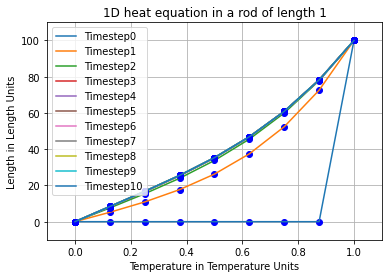

In [158]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import copy

## 1. Defining Parameters

L = 1             # Length of Rod 
dx = 0.1         # Length of each interval of rod
n = int(L/dx - 1) # Number of Intervals = L/dx - 1
alpha = 1         # Assume alpha is 1, change based on situation, ## Suggested to be kept same as dx
dt = 0.1

## 2. Creating two matrices for representing the rod

a_before = np.zeros(shape = n)
a_after = np.zeros(shape = n)

# 3. Setting up initial conditions
a_before[0] = 0
a_before[-1] = 100 ## Python starts counting from zero

#print(a_before)

## 4. Creating our Matrix A based on what we found about a,b,c, and d

A = np.zeros(shape = (n,n))
#print(A)

for j in range(n):
    
    try:
            A[j][j - 1]  = -alpha/(dx ** 2)

            A[j][j] = 1/dt + 2*alpha/(dx ** 2)
            A[j][j + 1] = -alpha/(dx **2)
            
    except:
        continue
    
A[0][-1] = 0 ###### Preventing the appearanc of rogue at the upper right corner

## 5. Applying the calculate Dirichlet boundary conditions to our A

A[0,0] = 1
A[0,1] = 0
A[-1, -2] = 0
A[-1, -1] = 1
#print(A)
        
#print(A)

## 6. Creating L and U for LU decomposition 

L = np.zeros(shape = (n,n))
U = np.zeros(shape = (n,n))

##print(L)
##print(U)

####Setting up the a1 = f1

U[0, 0] = A[0,0]
L[0, 0] = 1

#### Then setting up based on what we found about e and f from before

for j in range(1, n):
    
    #print("This is step ", j)

    L[j,j] = 1
        
    L[j,j-1] = A[j][j-1] / U[j-1][j-1]
        
    U[j-1,j] = A[j-1, j] 
        
    U[j,j]   = A[j,j] - L[j, j-1] * A[j-1, j]

    ##print(L)
    ##print(U)

##7.  Completed the LU Decomposition, Proceeding from LU Decomposition to solve equation

#plt.imshow(L@U)
#plt.show()
#plt.imshow(A)
#plt.show()
#Check if L@U=A

## We note that LUx = b
## We know that for us in the heat equation will store the d0, d1, d2, etc. 
## d1, d2, d3 etc. are the values from the previous timestep, so a_before
## We also know x is going to contain our values for the new timestep, without the coefficients
## We need to find x, i.e. the new timestep, using the values from the previous timestep 

## We begin by using substitution to solve for L(Ux) = b, to first obtain UX
## We then proceed to use subsitution to find x from Ux

print("Temperature with Initial Conditions")
print(a_before)

##Starting a list to be populated by timesteps
timesteps = [a_before ]

for i in range(0, 10):
    
    ##Let's begin by populating our b matrix 
    b = (1/dt) * copy.deepcopy(a_before)

    ##We then need to remember to apply the boundary conditions to b

    b[0]  = 0
    b[-1] = 100
    
    ## From Ax = b, by back subsitution, we have LUx = b
    ## We first find L(Ux) = b, we know L, and we know b, thus we can find Ux
    ## We are going to solve for Ux first, by using back substitution

    #print(b)
    #print(L)

    UX = np.zeros(n)

    for i in range(n-1, -1, -1):
        tmp = b[i]  
        for j in range(n-1, i, -1):
            tmp -= UX[j]*L[i,j]

        UX[i] = tmp/L[i,i]

    #print(UX)

    ## Thus, we know that UX = [sth, sth, \ldots, sth, sth]

    ## Since the equation is U@x = UX 
    ## We know U from LU factorization, and we know UX from the repvious step, thus, we can solve for x

    #print(U)
    #print(UX)

    ## We apply the same thing as before
    ## This time, we are solving for X in UX, so U@X = UX
    ## Before, we were solving for UX in LUX = b
    ## So instead of b we write UX, instead of L we write U, and instead of UX we write X

    X = np.zeros(n)

    for i in range(n-1, -1, -1):
        tmp = UX[i]
        for j in range(n-1, i, -1):
            tmp -= X[j]*U[i,j]

        X[i] = tmp/U[i,i]

    #print(X) 

    ## Ok, so now we have obtained an X, which is the solution to the new timestep, let's update the timesteps. 

    a_before = copy.deepcopy(X)
    a_after = np.zeros(shape = n)

    #print(a_before)
    #print(a_after)
    timesteps.append(a_before)
    ##EXTRA: I will store the A_before in a list and plot it to demonstrate the change
    
print("Temperature for final timestep ")
print(a_before)

for i in range(len(timesteps)):
    plt.title("1D heat equation in a rod of length 1")
    plt.grid(True)
    plt.margins(0.1)
    plt.xlabel("Temperature in Temperature Units")
    plt.ylabel("Length in Length Units")
    
    plt.plot(list(np.linspace(0, 1 ,n)), timesteps[i], "bo")
    plt.plot(list(np.linspace(0, 1 ,n)), timesteps[i], label = "Timestep" + str(i))
    
    plt.legend()
    

#### Note: you do not neccesarily have to go through the steps outlined in the same order
#### Note: More complex simulations may require extra steps
#### Go through your derivations slowly and meticulously step by step before proceeding to code it out
#### It will save you lot's of headaches !!!


## V. Initial Guess

Because the BTCS scheme is unconditionally stable, it actually does not matter what you place inside as a guess of the initial guess for the temperature of the system, since it will, if the problem will eventually reach steady state, reach that steady state, and the  For example, in my 1D rod, I know that the boundaries are controlled by my Dirichlet boundary conditions, but what is in between the boundaries is not. Therefore, instead of let's say 0 in between, I could put 2000 or 20000, the system will still eventually come to the same steady state as before. 

However, a bad initial guess is a bad practice, and while BTCS is unconditionally stable, it is not okay to bully your computer into making unneccesary calculations. <span class = "Hail the Omnissiah! He is the God in the Machine, the Source of All Knowledge.">If you treat your computer nicely, the computer will also treat you nicely. </span>. Thus, it is always helpful to give the computer a good initial guess. 

Benefits of a good initial guess include

- Less steps to reach the steady state, less computational power required
- Less likely for the scheme used and the computer to get confused and give weird bugs
- Less likely to fall into a local minima instead of the absolute minima

For example, a good initial guess as to the final temeprature state in the rod would be that there is a steady increase in temeprature from the cold end of the rod to the hot end of the rod, with the coldest temepratures not colder than the cold end, and the hottest temeperatures not hotter than the hot end. 